In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("data/new_model.csv")

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
possible_features = ["rank_home", "rank_away"] + df.columns[8:25].tolist() + df.columns[37:-2].tolist()

In [7]:
df['total_games_home'] = df.apply(lambda x: len(df[(df.home_team == x["home_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["home_team"]) & (df.date < x["date"])]), axis=1)

In [8]:
df['total_games_away'] = df.apply(lambda x: len(df[(df.home_team == x["away_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["away_team"]) & (df.date < x["date"])]), axis=1)

In [9]:
df_model = df[(df.total_games_home > 5) & (df.total_games_away > 5)]

In [10]:
df_model[["home_team", "away_team", "home_score", "away_score", "home_goals_mean", "home_goals_mean_l5"]]

,home_team,away_team,home_score,away_score,home_goals_mean,home_goals_mean_l5
206,Iraq,Bahrain,2.0,2.0,1.714286,1.2
208,Bahrain,Saudi Arabia,1.0,0.0,1.125000,1.2
316,Spain,Switzerland,1.0,0.0,2.714286,3.4
317,Ukraine,Germany,1.0,2.0,1.428571,1.2
318,Luxembourg,Cyprus,2.0,0.0,0.714286,1.0
...,...,...,...,...,...,...
3685,Australia,Palestine,5.0,0.0,1.829268,2.8
3686,Cuba,Cayman Islands,3.0,0.0,1.107143,0.4
3687,Guyana,Belize,3.0,1.0,2.000000,2.2
3688,Dominican Republic,British Virgin Islands,4.0,0.0,1.375000,0.8


### Home Team 

- Regression Line -> find most correlated
- KDE plot -> not visible correlation, but significant changes in distribution

In [11]:
target = 'home_score'

In [12]:
df_feats = df_model[[target] + possible_features]

In [13]:
possible_features[10:20]

['home_rank_mean_l5',
 'home_points_mean',
 'home_points_mean_l5',
 'away_goals_mean',
 'away_goals_mean_l5',
 'away_goals_suf_mean',
 'away_goals_suf_mean_l5',
 'away_rank_mean',
 'away_rank_mean_l5',
 'total_games_away']

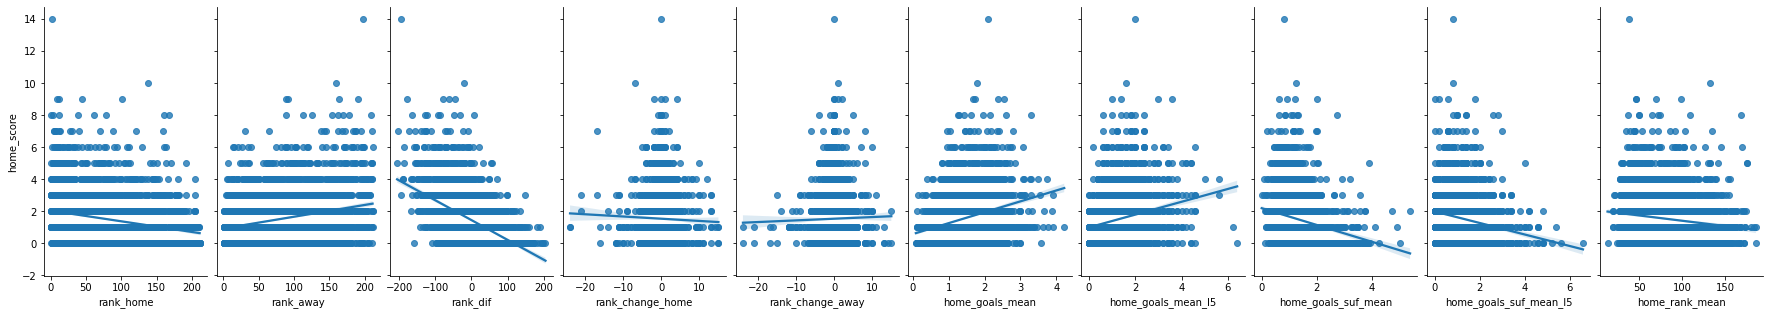

In [14]:

#for i in [10, 20, 29]:
g = sns.pairplot(df_feats, kind="reg", diag_kind=None,
            y_vars = [target],
            x_vars = possible_features[:10],
            )
g.fig.set_size_inches(25,5)

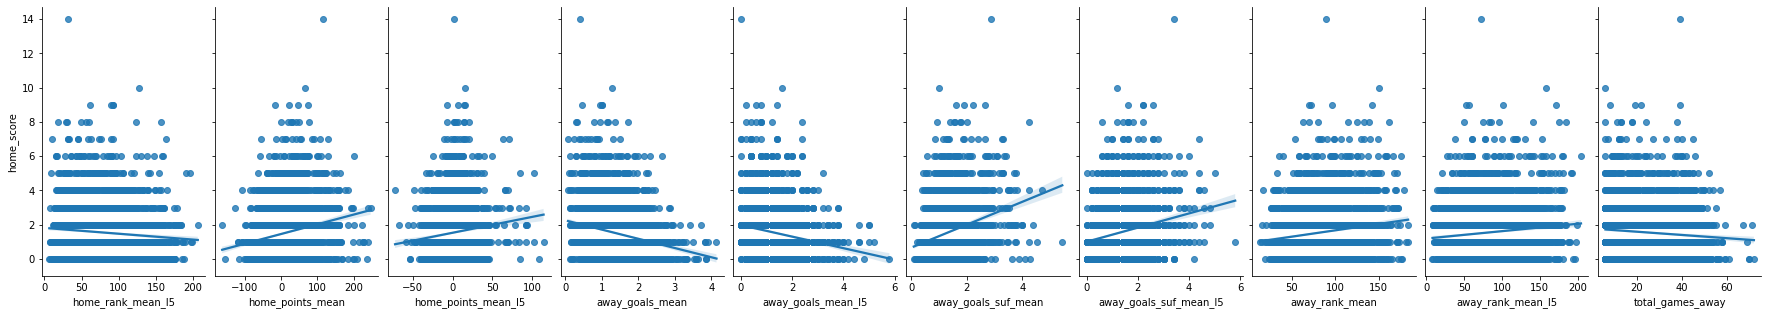

In [15]:

#for i in [10, 20, 29]:
g = sns.pairplot(df_feats, kind="reg", diag_kind=None,
            y_vars = [target],
            x_vars = possible_features[10:20],
            )
g.fig.set_size_inches(25,5)

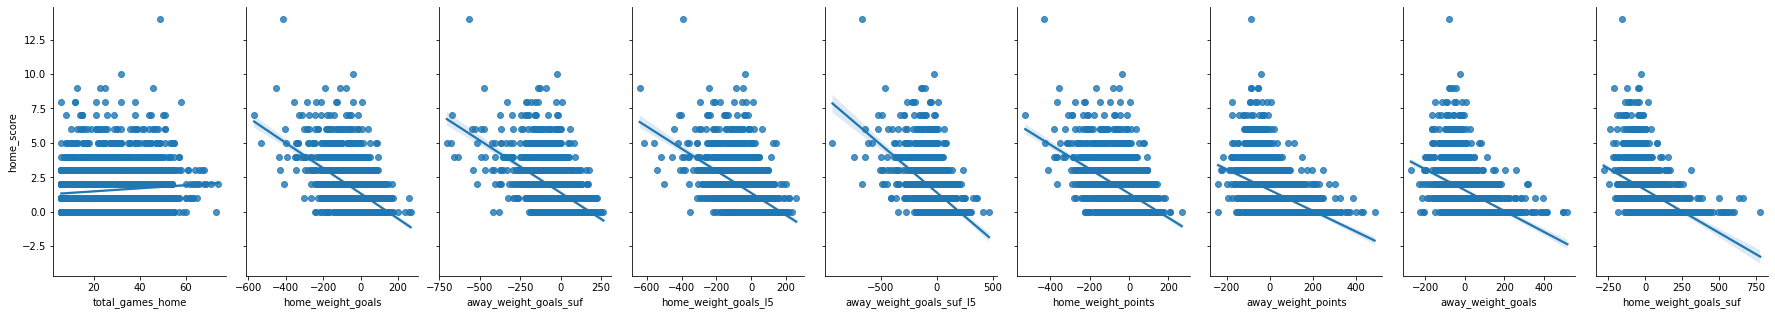

In [16]:
g = sns.pairplot(df_feats, kind="reg", diag_kind=None,
            y_vars = [target],
            x_vars = possible_features[20:],
            )
g.fig.set_size_inches(25,5)

rank_dif -> visible relantionship


below we can evaluate to see if their values are impacting in the distribution of the home goals:

 'home_weight_goals',
 'away_weight_goals_suf',
 'home_weight_goals_l5',
 'away_weight_goals_suf_l5',
 'home_weight_points',
 'away_weight_points',

Since goals is a continuous variable that follows a poisson distribution, with very limited values, using only a regression to select the variables is very unuseful. I'll analyse also the distributions

In [17]:
pos_cols = [['home_weight_goals','home_weight_goals_l5',],
            ['away_weight_goals_suf','away_weight_goals_suf_l5',],
            ['home_weight_points','away_weight_points',]]

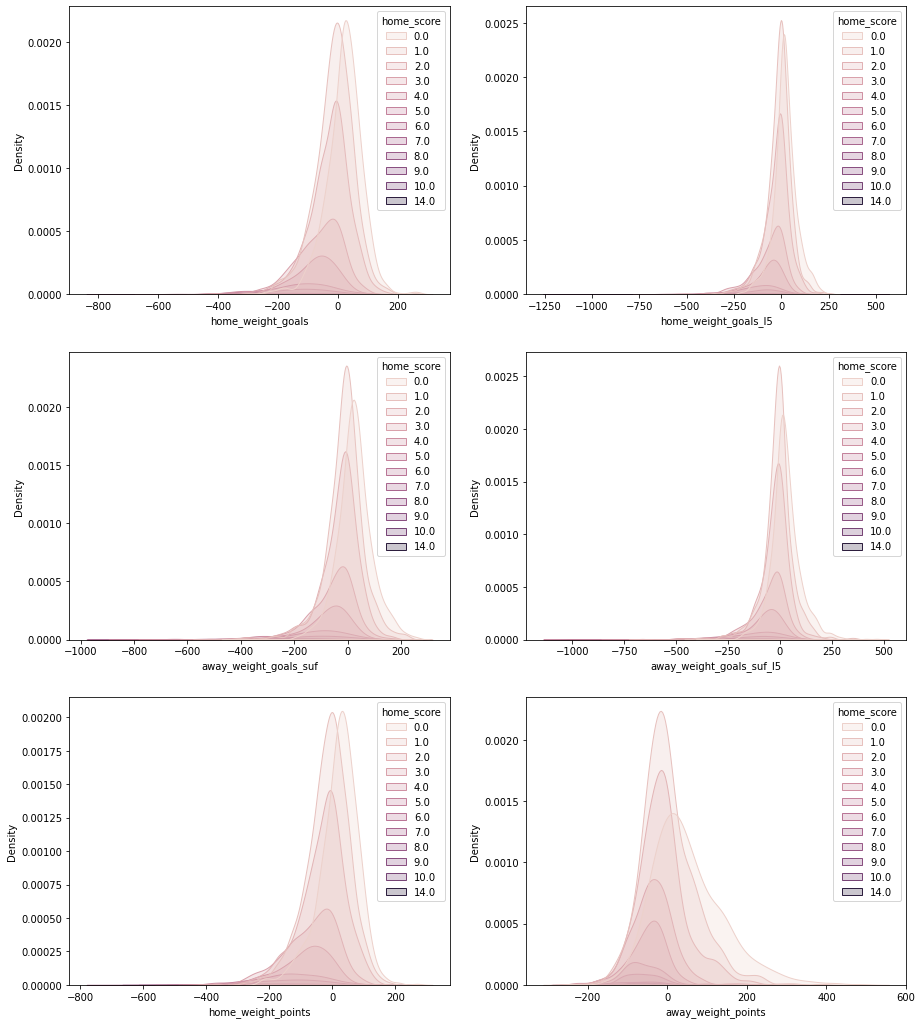

In [19]:
f, axes = plt.subplots(3, 2, figsize=(15, 18))

for (ax, pc) in zip(axes, pos_cols):
    sns.kdeplot(data = df_feats, x = pc[0], hue = target, fill=True, warn_singular=False, ax=ax[0])
    sns.kdeplot(data = df_feats, x = pc[1], hue = target, fill=True, warn_singular=False, ax=ax[1])

In [20]:
home_cols = ["home_weight_goals", "away_weight_goals_suf", 'home_weight_points','away_weight_points']

In [21]:
df_model[["home_score"]+home_cols].to_csv("data/home_db.csv", index=False)

### Away Team 

- Regression Line -> find most correlated
- KDE plot -> not visible correlation, but significant changes in distribution

In [22]:
target = 'away_score'

In [23]:
df_feats = df_model[[target] + possible_features]

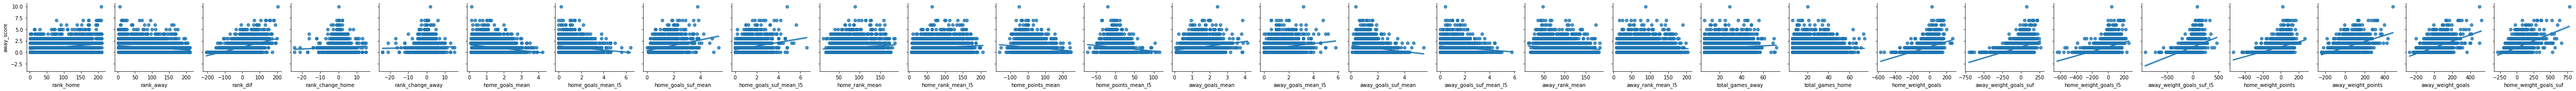

In [24]:
sns.pairplot(df_feats, kind="reg", diag_kind=None,
            y_vars = [target],
            x_vars = possible_features)


In [25]:
pos_cols = [['away_weight_goals','home_weight_goals_suf',],
            ['home_weight_points','away_weight_points',]]

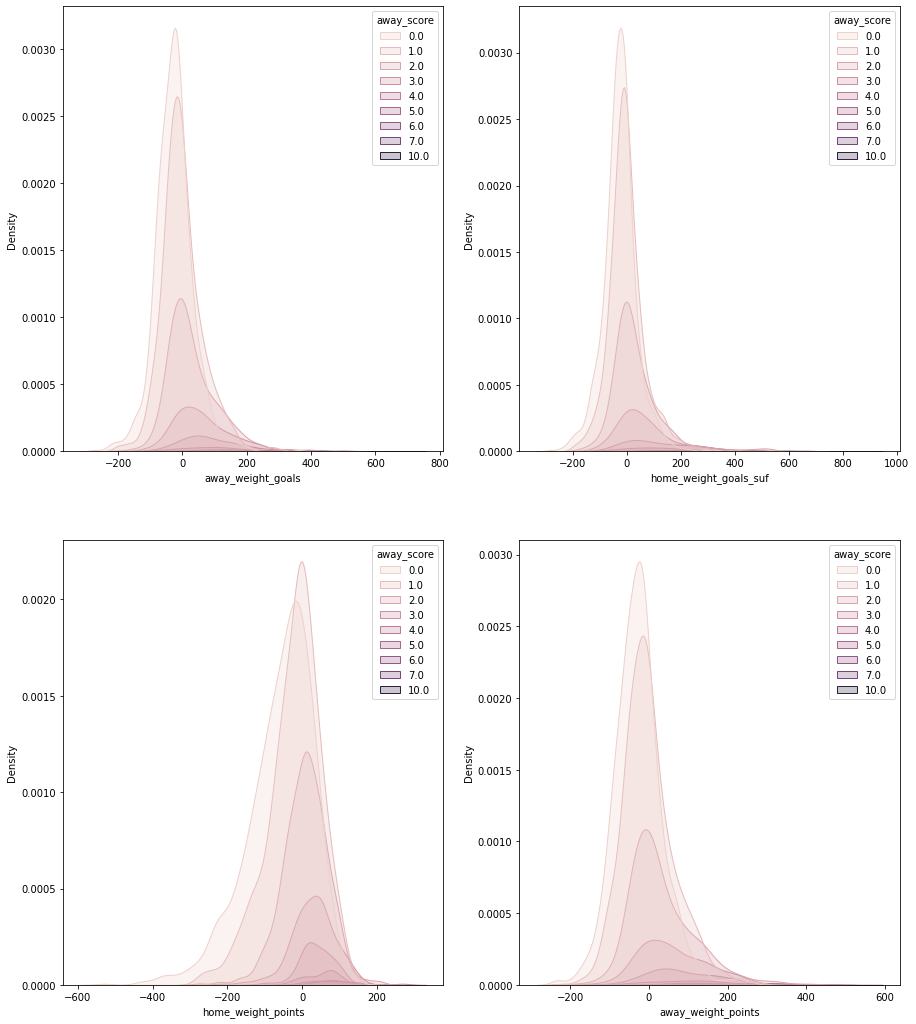

In [26]:
f, axes = plt.subplots(2, 2, figsize=(15, 18))

for (ax, pc) in zip(axes, pos_cols):
    sns.kdeplot(data = df_feats, x = pc[0], hue = target, fill=True, warn_singular=False, ax=ax[0])
    sns.kdeplot(data = df_feats, x = pc[1], hue = target, fill=True, warn_singular=False, ax=ax[1])

In [27]:
away_cols = ['away_weight_goals','home_weight_goals_suf','home_weight_points','away_weight_points']

In [28]:
df_model[["away_score"]+away_cols].to_csv("data/away_db.csv", index=False)